In [1]:
import pandas as pd, matplotlib.pyplot as plt, seaborn as sns, numpy as np

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
df = pd.read_csv('customer_booking.csv', encoding="ISO-8859-1")

In [3]:
df

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2,Internet,RoundTrip,27,6,9,Sat,PERPNH,Australia,1,0,1,5.62,0
49996,1,Internet,RoundTrip,111,6,4,Sun,PERPNH,Australia,0,0,0,5.62,0
49997,1,Internet,RoundTrip,24,6,22,Sat,PERPNH,Australia,0,0,1,5.62,0
49998,1,Internet,RoundTrip,15,6,11,Mon,PERPNH,Australia,1,0,1,5.62,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

In [5]:
df.describe()

,num_passengers,purchase_lead,length_of_stay,flight_hour,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,50000.000000,50000.000000,50000.00000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.591240,84.940480,23.04456,9.06634,0.668780,0.296960,0.427140,7.277561,0.149560
std,1.020165,90.451378,33.88767,5.41266,0.470657,0.456923,0.494668,1.496863,0.356643
min,1.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,21.000000,5.00000,5.00000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,51.000000,17.00000,9.00000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,115.000000,28.00000,13.00000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,867.000000,778.00000,23.00000,1.000000,1.000000,1.000000,9.500000,1.000000


In [6]:
# Checks the data types of each coloumn
df.dtypes

num_passengers             int64
sales_channel             object
trip_type                 object
purchase_lead              int64
length_of_stay             int64
flight_hour                int64
flight_day                object
route                     object
booking_origin            object
wants_extra_baggage        int64
wants_preferred_seat       int64
wants_in_flight_meals      int64
flight_duration          float64
booking_complete           int64
dtype: object

In [7]:
# Check for Null values
df.isna().values.any()

False

In [8]:
# List out all columns in the dataset
df.columns

Index(['num_passengers', 'sales_channel', 'trip_type', 'purchase_lead',
       'length_of_stay', 'flight_hour', 'flight_day', 'route',
       'booking_origin', 'wants_extra_baggage', 'wants_preferred_seat',
       'wants_in_flight_meals', 'flight_duration', 'booking_complete'],
      dtype='object')

### Exploratory Analysis

Sum of passengers in the dataset

In [9]:
total_passengers = df['num_passengers'].sum()
print(f'The sum of passengers in the dataset is {total_passengers}')

The sum of passengers in the dataset is 79562


Booking completed Distribution

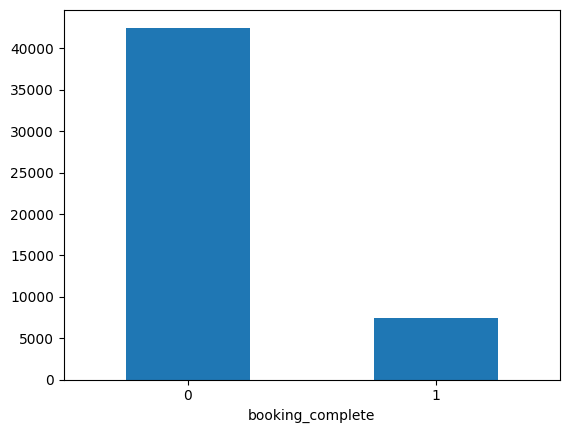

In [10]:
df['booking_complete'].value_counts().plot(kind='bar')
plt.xticks(rotation=0)
plt.show()

What is the maximun and minimum fight hour and duration?

In [11]:
df[['flight_hour', 'flight_duration']].agg(['min', 'max'])

,flight_hour,flight_duration
min,0,4.67
max,23,9.50


### Machine Learning

- Preprocessing
- Balancing OverFitting
- Encoding
- Feature Enginerring 
- Modelling
- Prediction

In [12]:
from sklearn.preprocessing import LabelEncoder

In [13]:
filt = df.select_dtypes(include=['object']).columns

In [14]:
le = LabelEncoder()

for column in filt:
    df[column] = le.fit_transform(df[column])

In [15]:
yes_df = df[df['booking_complete'] == 1]

In [16]:
no_df = df[df['booking_complete'] == 0].sample(yes_df.shape[0])

In [17]:
df = pd.concat([yes_df,no_df], ignore_index=True)

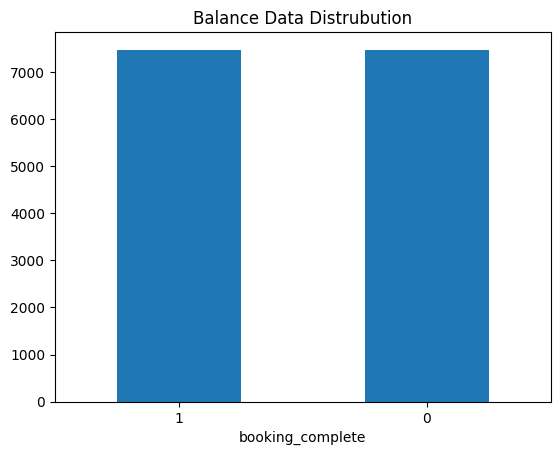

In [18]:
df['booking_complete'].value_counts().plot(kind='bar')
plt.xticks(rotation=0)
plt.title('Balance Data Distrubution')
plt.show()

In [19]:
# Get important Features
selected_features = ['trip_type', 'flight_hour', 'booking_origin', 'wants_extra_baggage', 'wants_preferred_seat', 'wants_in_flight_meals', 'flight_duration']

In [20]:
corr_df = pd.concat([df[selected_features],df['booking_complete']], axis=1)

In [21]:
cm = corr_df.corr()

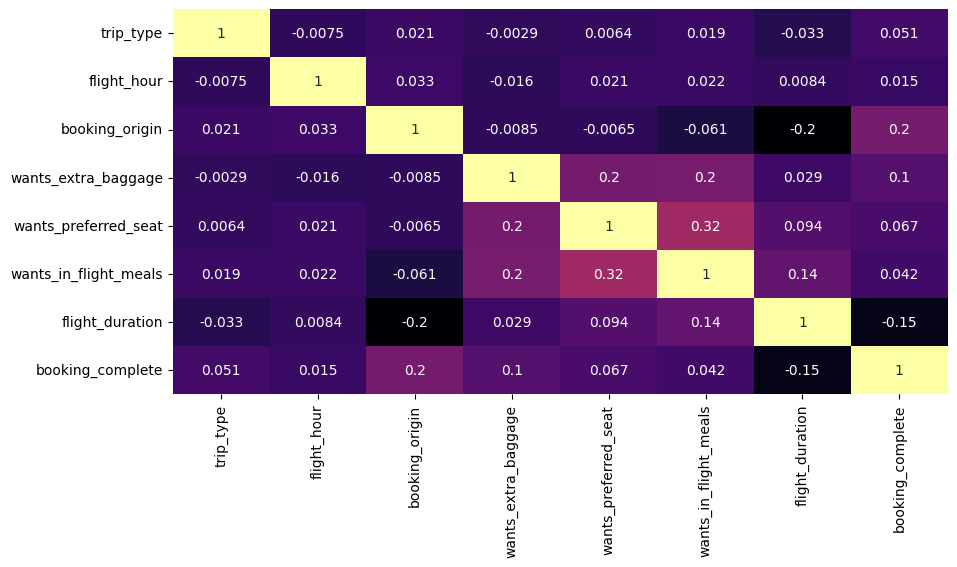

In [22]:
plt.figure(figsize=(10,5))
sns.heatmap(cm, cmap='inferno', annot=True, cbar=False)
plt.show()

In [23]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

import xgboost as xgb
from sklearn.metrics import mean_squared_error, accuracy_score, confusion_matrix, classification_report, roc_curve, auc
from sklearn.model_selection import cross_val_score

In [24]:
X = df[selected_features].values
y = df['booking_complete'].values

In [25]:
sc = StandardScaler()
X = sc.fit_transform(X)

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [27]:
model = xgb.XGBClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [28]:
confusion_matrix = confusion_matrix(y_test, y_pred)

In [29]:
accuracy_score = accuracy_score(y_test, y_pred)
classification_report = classification_report(y_test, y_pred)

In [30]:
ac = np.round(accuracy_score * 100,2)
print(f'Accuracy Score: {ac}%')

Accuracy Score: 68.11%


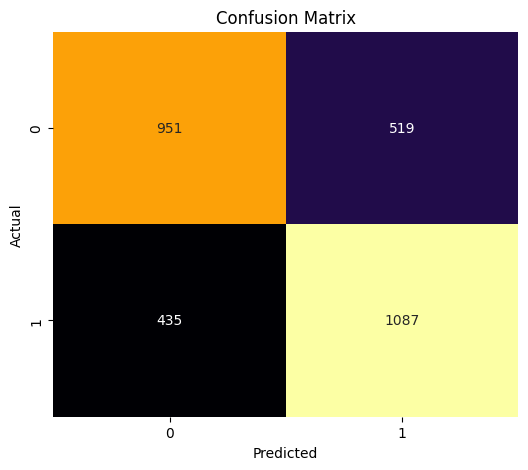

In [31]:
plt.figure(figsize=(6,5))
sns.heatmap(confusion_matrix, cmap='inferno', cbar=False, annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [32]:
print(f'Classification Report \n {classification_report}')

Classification Report 
               precision    recall  f1-score   support

           0       0.69      0.65      0.67      1470
           1       0.68      0.71      0.70      1522

    accuracy                           0.68      2992
   macro avg       0.68      0.68      0.68      2992
weighted avg       0.68      0.68      0.68      2992



In [33]:
# Perform 5-fold cross-validation and calculate accuracy
scores = cross_val_score(model, X, y, cv=2, scoring='accuracy')

# Print the cross-validation scores
print("Cross-validation scores:", scores)
print("Mean accuracy:", scores.mean())

Cross-validation scores: [0.59735223 0.64642953]
Mean accuracy: 0.6218908799144156


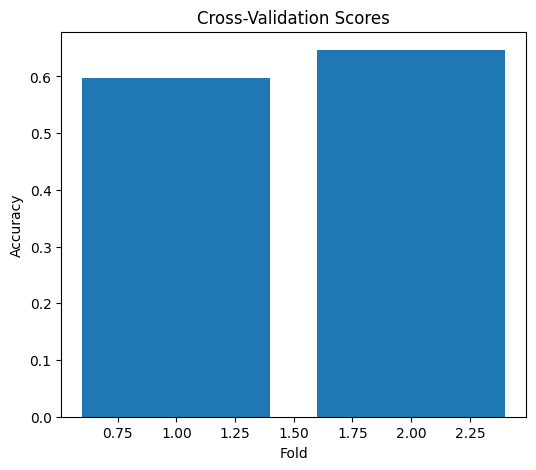

In [34]:
# Plot the cross-validation scores
plt.figure(figsize=(6,5))
plt.bar(range(1, len(scores) + 1), scores)
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.title('Cross-Validation Scores')
plt.show()

In [35]:
mse = mean_squared_error(y_test,y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 0.31885026737967914


In [36]:
# Predict probabilities of class 1 (positive class) on the test set
y_prob = model.predict_proba(X_test)[:, 1]

In [37]:
# Calculate ROC curve and ROC AUC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

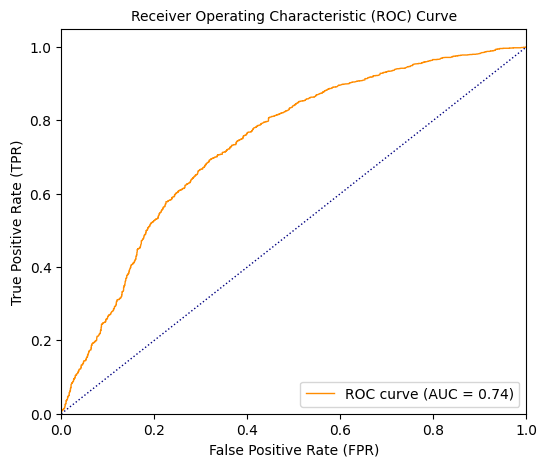

In [38]:
# Plot ROC curve
plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, color='darkorange', lw=1, label=f'ROC curve (AUC = {np.round(roc_auc,2)})')
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='dotted')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve', fontsize=10)
plt.legend(loc='lower right')
plt.show()